In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\sneha\Github file\custumer churn prediction\Churn Prdiction Data\churn-bigml-80.csv")
df_test = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\sneha\Github file\custumer churn prediction\Churn Prdiction Data\churn-bigml-20.csv")
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# EXPLORING DATASET

In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
#shape
print(df_train.shape)

(2666, 20)


In [6]:
#data types
print(df_train.dtypes)

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


# EDA

In [7]:
# Summary statistics for numeric columns
print(df_train.describe())

       Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.21573

1. Class imbalance

2. null values

In [8]:
# Check for missing values
print(df_train.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


## Visualizations

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


## 1. Histograms

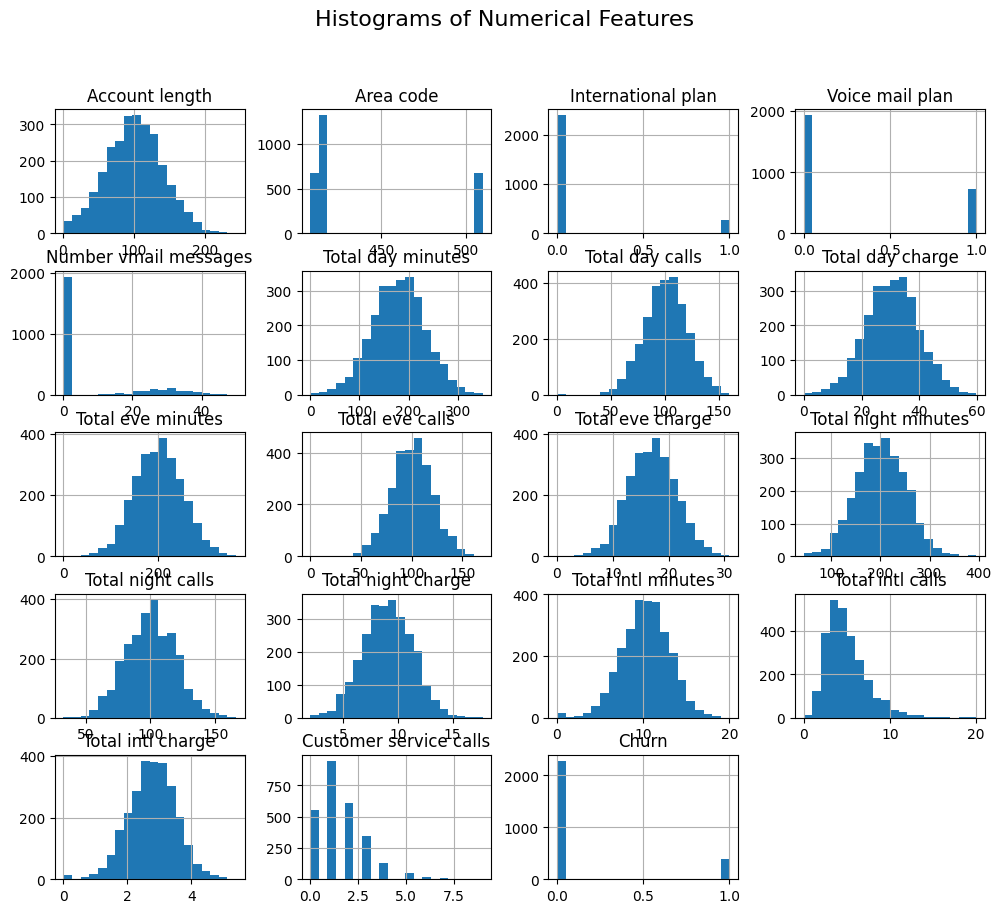

In [42]:
df_train[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

## 2. Boxplots

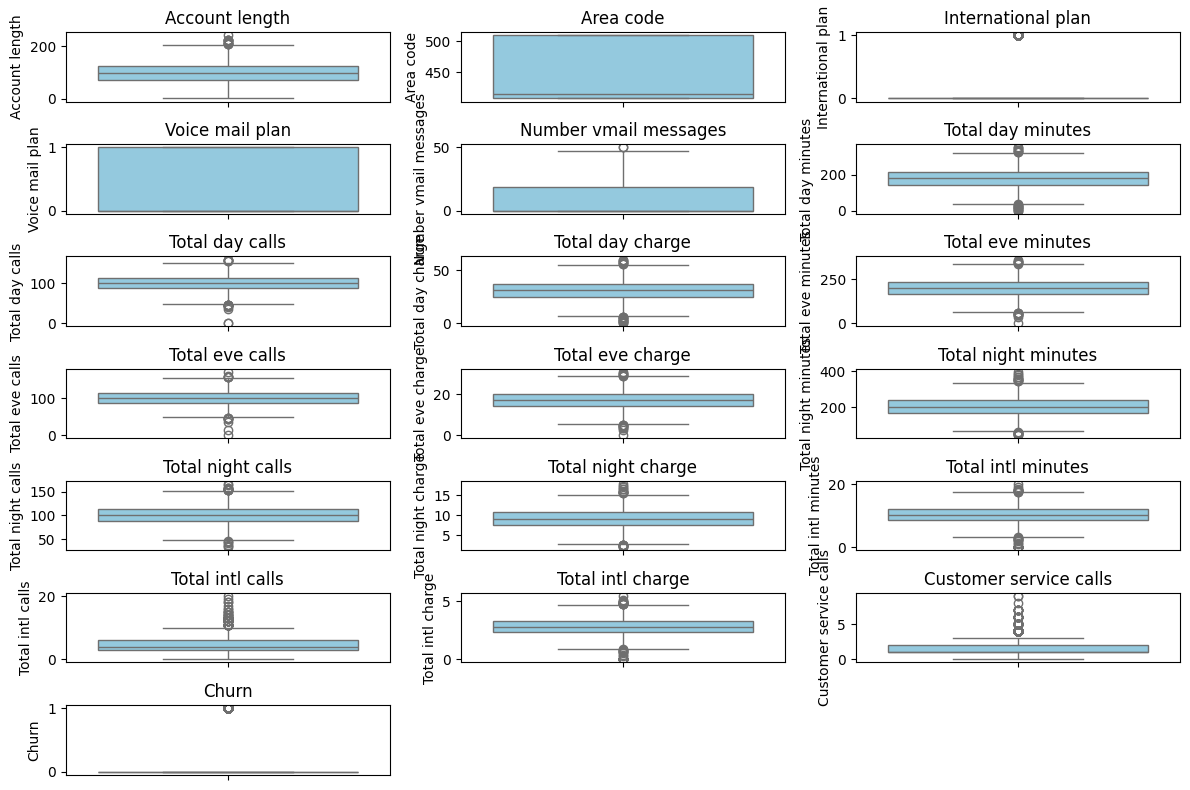

In [43]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()

## 3. Bar Plots

Categorical columns: ['State']


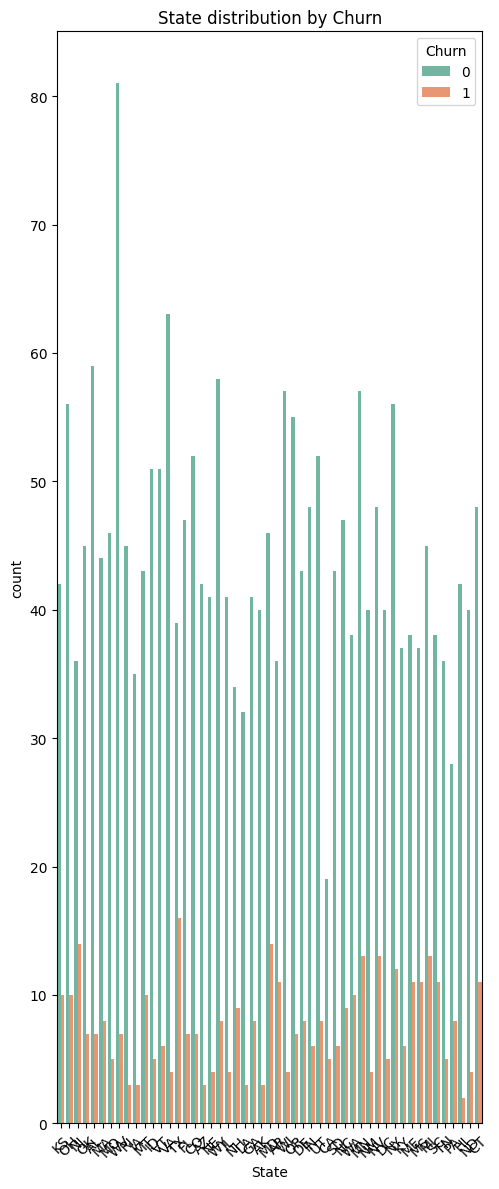

In [40]:
# Categorical columns
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", list(cat_cols))

plt.figure(figsize=(14, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//3 + 1, 3, i)
    sns.countplot(data=df_train, x=col, hue="Churn", palette="Set2")
    plt.title(f"{col} distribution by Churn")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Correlation Heatmap

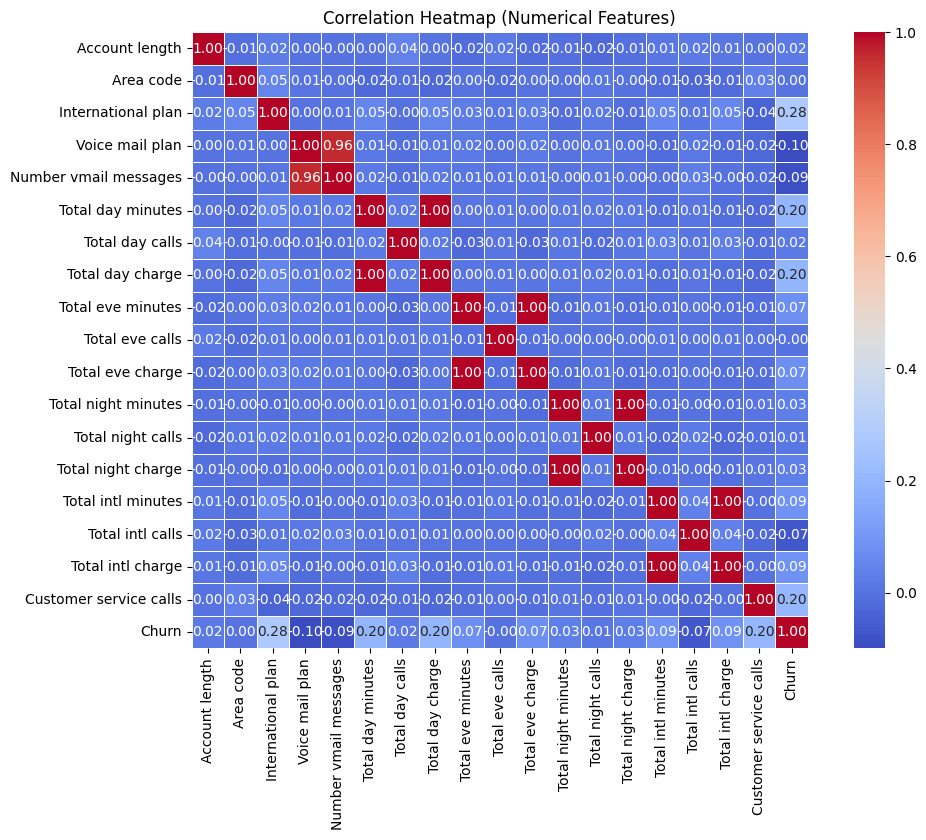

In [44]:
if len(num_cols) > 1:   # only if we have at least 2 numeric cols
    corr = df_train[num_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
    plt.title("Correlation Heatmap (Numerical Features)")
    plt.show()
else:
    print("Not enough numeric columns to plot correlation heatmap.")

# DATA PREPROCESSING

# 1. Handling categorical variables

In [9]:
#object columns
object_columns = df_train.select_dtypes(include='object').columns
print(object_columns)

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')


In [10]:
object_cols = df_train.select_dtypes(include='object')
print(object_cols)

     State International plan Voice mail plan
0       KS                 No             Yes
1       OH                 No             Yes
2       NJ                 No              No
3       OH                Yes              No
4       OK                Yes              No
...    ...                ...             ...
2661    SC                 No              No
2662    AZ                 No             Yes
2663    WV                 No              No
2664    RI                 No              No
2665    TN                 No             Yes

[2666 rows x 3 columns]


In [12]:
#check value count for cat columns

In [11]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_train.select_dtypes(include=['object', 'bool']).columns

num_cols, cat_cols


(Index(['Account length', 'Area code', 'Number vmail messages',
        'Total day minutes', 'Total day calls', 'Total day charge',
        'Total eve minutes', 'Total eve calls', 'Total eve charge',
        'Total night minutes', 'Total night calls', 'Total night charge',
        'Total intl minutes', 'Total intl calls', 'Total intl charge',
        'Customer service calls'],
       dtype='object'),
 Index(['State', 'International plan', 'Voice mail plan', 'Churn'], dtype='object'))

In [12]:
df_train['International plan'] = df_train['International plan'].map({'Yes': 1, 'No': 0})
df_train['Voice mail plan'] = df_train['Voice mail plan'].map({'Yes': 1, 'No': 0})
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
# Convert target 'Churn' from True/False to 1/0
df_train['Churn'] = df_train['Churn'].astype(int)
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [14]:
# Drop 'State' column
df = df_train.drop(columns=['State'])
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 2. Handling class imbalance

In [15]:
#Understand how balanced the classes(target)
# Count values of Churn
df['Churn'].value_counts()

Churn
0    2278
1     388
Name: count, dtype: int64

In [16]:
#data imbalance handling
#upsampling,downsampling alg used SMOTE,ADASYN
#classweight  (nale nokkam)


In [17]:
# Percentage
df['Churn'].value_counts(normalize=True) * 100

Churn
0    85.446362
1    14.553638
Name: proportion, dtype: float64

In [18]:
X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)  

In [19]:
# Split train/test (keep the same ratio via stratify)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)
print("Train churn % before SMOTE:\n", (y_train.value_counts(normalize=True)*100).round(2))

Train size: (2132, 18)  Test size: (534, 18)
Train churn % before SMOTE:
 Churn
0    85.46
1    14.54
Name: proportion, dtype: float64


In [20]:
import pandas as pd

X_train_enc = pd.get_dummies(X_train, drop_first=False)
X_test_enc  = pd.get_dummies(X_test,  drop_first=False)

# Align columns so test has the same dummy columns as train
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

print("Encoded train shape:", X_train_enc.shape, " Encoded test shape:", X_test_enc.shape)


Encoded train shape: (2132, 18)  Encoded test shape: (534, 18)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled  = scaler.transform(X_test_enc)


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE, train class distribution (%):")
print((y_train_sm.value_counts(normalize=True)*100).round(2))
print("Resampled train shape:", X_train_sm.shape)


After SMOTE, train class distribution (%):
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64
Resampled train shape: (3644, 18)


## 1. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train on SMOTE-balanced training set
log_reg.fit(X_train_sm, y_train_sm)

# Predict on test set (original imbalanced)
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:,1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba), 3))


Classification Report:
              precision    recall  f1-score   support

           0      0.926     0.763     0.837       456
           1      0.316     0.641     0.424        78

    accuracy                          0.745       534
   macro avg      0.621     0.702     0.630       534
weighted avg      0.837     0.745     0.776       534

Confusion Matrix:
[[348 108]
 [ 28  50]]
ROC-AUC Score: 0.748


## 2. Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sm, y_train_sm)

y_pred_dt = dt.predict(X_test_scaled)
y_proba_dt = dt.predict_proba(X_test_scaled)[:,1]

print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt, digits=3))
print("Decision Tree ROC-AUC:", round(roc_auc_score(y_test, y_proba_dt), 3))


Decision Tree Report:
               precision    recall  f1-score   support

           0      0.944     0.895     0.919       456
           1      0.529     0.692     0.600        78

    accuracy                          0.865       534
   macro avg      0.737     0.794     0.759       534
weighted avg      0.884     0.865     0.872       534

Decision Tree ROC-AUC: 0.794


## 3. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:,1]

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf, digits=3))
print("Random Forest ROC-AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))


Random Forest Report:
               precision    recall  f1-score   support

           0      0.958     0.961     0.959       456
           1      0.766     0.756     0.761        78

    accuracy                          0.931       534
   macro avg      0.862     0.858     0.860       534
weighted avg      0.930     0.931     0.931       534

Random Forest ROC-AUC: 0.877


## 4. SVM

In [26]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train_sm, y_train_sm)

y_pred_svm = svm_clf.predict(X_test_scaled)
y_proba_svm = svm_clf.predict_proba(X_test_scaled)[:,1]

print("SVM Report:\n", classification_report(y_test, y_pred_svm, digits=3))
print("SVM ROC-AUC:", round(roc_auc_score(y_test, y_proba_svm), 3))


SVM Report:
               precision    recall  f1-score   support

           0      0.934     0.939     0.937       456
           1      0.632     0.615     0.623        78

    accuracy                          0.891       534
   macro avg      0.783     0.777     0.780       534
weighted avg      0.890     0.891     0.891       534

SVM ROC-AUC: 0.856


## 5. XGBoost

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_sm, y_train_sm)

y_pred_xgb = xgb.predict(X_test_enc)
y_proba_xgb = xgb.predict_proba(X_test_enc)[:,1]

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb, digits=3))
print("XGBoost ROC-AUC:", round(roc_auc_score(y_test, y_proba_xgb), 3))


c:\Users\user\anaconda3\envs\codveda\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:10:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Report:
               precision    recall  f1-score   support

           0      0.000     0.000     0.000       456
           1      0.146     1.000     0.255        78

    accuracy                          0.146       534
   macro avg      0.073     0.500     0.127       534
weighted avg      0.021     0.146     0.037       534

XGBoost ROC-AUC: 0.459


c:\Users\user\anaconda3\envs\codveda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\anaconda3\envs\codveda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\anaconda3\envs\codveda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh